# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 2nd, 23:00 h** 

In [1]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def visualize3(tigre_f,tigre_x,tigre_xb,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre_xb, cmap='gray')


def visualize4(tigre1,tigre2,tigre3,tigre4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,4,1)
    plt.title(label1)
    plt.imshow(tigre1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,4,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre2, cmap='gray')
    fig.add_subplot(1,4,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(tigre3, cmap='gray')
    fig.add_subplot(1,4,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(tigre4, cmap='gray')

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

**FirstPart: Template Matching and Image Descriptors**

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

**Second Part: Image matching**

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

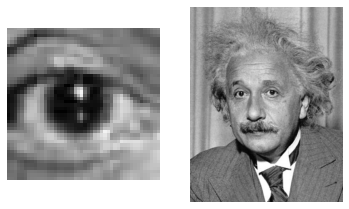

In [2]:
# Show the original image and the template image
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(1,2,1)
eye=io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein=io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook/tm.png" width="400" height="120">

**Use titles in all figures to understand what is being displayed.**

<ipython-input-3-bd4edb8b5635>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  einstein = rgb2gray(img_as_float(einstein))
<ipython-input-3-bd4edb8b5635>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  eye = rgb2gray(img_as_float(eye))


1.0 0.0


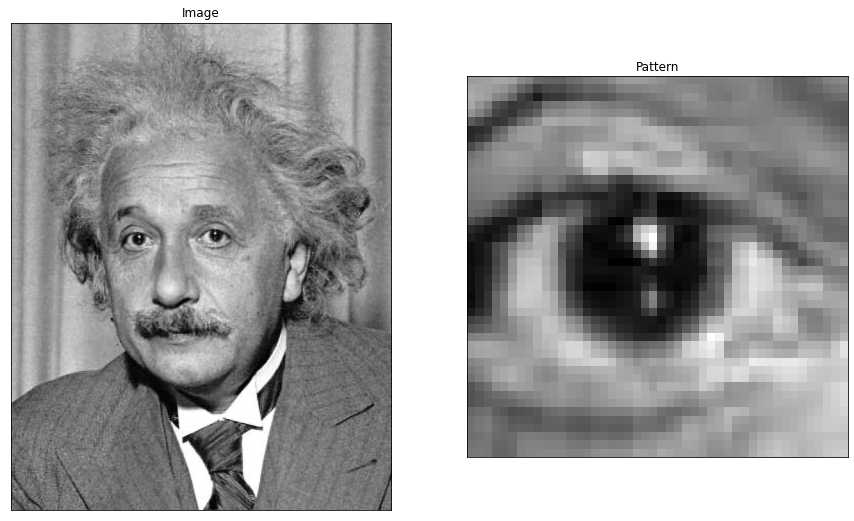

In [3]:
from skimage.color import rgb2gray
from skimage.feature import match_template
from skimage import img_as_float

einstein = io.imread('./images/einstein.png')
eye = io.imread('./images/eye.png')

einstein = rgb2gray(img_as_float(einstein))
eye = rgb2gray(img_as_float(eye))


print(einstein.max(), einstein.min())
einstein_ncc = match_template(einstein, eye)

visualize2(einstein, eye, 'Image', 'Pattern')

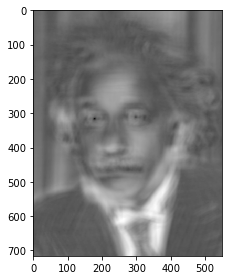

In [4]:
import numpy as np
from numpy import linalg

einstein_2 = einstein.copy()

def normalize(image): return (image[:,:]- image.min())/(image.max() - image.min())


def ssd(image, pattern):
    
    pattern = normalize(pattern)
    image = normalize(image)
    
    x = image.shape[0]
    y = image.shape[1]
    i = pattern.shape[0]
    j = pattern.shape[1]
    
    result = img_as_float(np.ones((x-i,y-j)))
    
    for n in range(0,x-i):
        for m in range(0, y-j):
            aux = pattern-image[n:n+i,m:m+j]
            
            result[n,m] = np.linalg.norm(aux)
            
    return img_as_float(result)



def ssd_fast(image, pattern): 
    
    pattern = normalize(pattern)
    image = normalize(image)
    
    x = image.shape[0]
    y = image.shape[1]
    i = pattern.shape[0]
    j = pattern.shape[1]
    
    return normalize(np.array([[np.linalg.norm(np.linalg.norm(pattern-image[n:n+i,m:m+j])) for m in range(0, y-j)] for n in range(0,x-i)]))

#a = ssd(einstein_nc, eye)
einstein_ed = ssd_fast(einstein_2, eye)

io.imshow(einstein_ed, cmap='gray')
plt.show()

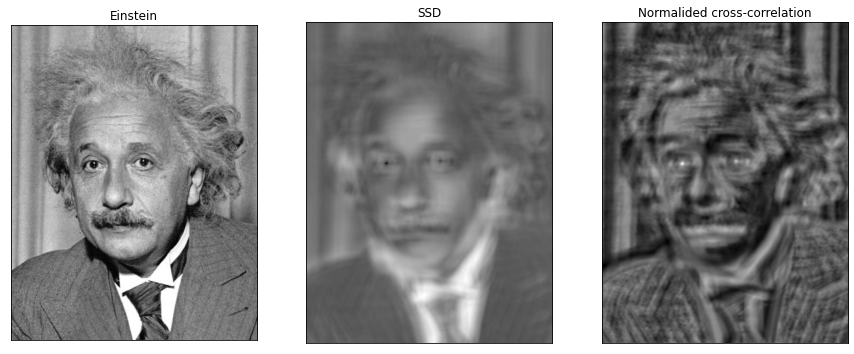

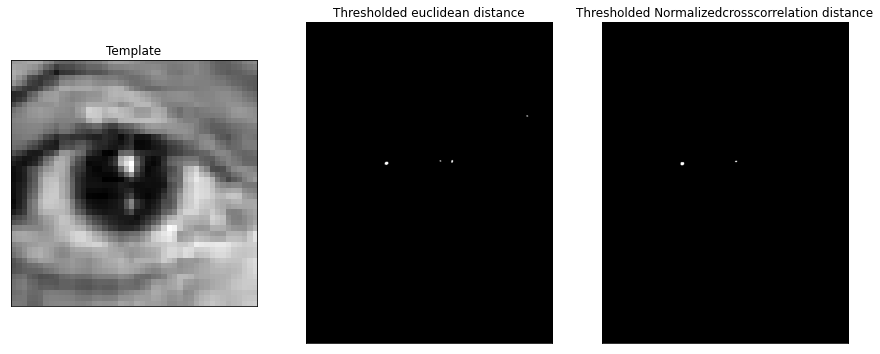

In [5]:
#thresholds

def mask_ssd(image, threshold):
    mask = np.ones(image.shape)
    mask[image > threshold] = 0
    return mask

def mask_ncc(image, threshold):
    mask = np.ones(image.shape)
    image = normalize(image)
    mask[image <= image.max() - threshold] = 0
    return mask

einstein_ncc_mask = np.ones(einstein_ncc.shape)
einstein_ed_mask = np.ones(einstein_ed.shape)


visualize3(einstein, einstein_ed, einstein_ncc, 
           'Einstein', 'SSD', 'Normalided cross-correlation')
visualize3(eye, mask_ssd(einstein_ed, 0.296),mask_ncc(einstein_ncc, 0.296), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 1.2 How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)?

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

Note: Use titles of the figures to explain what is displayed.


Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

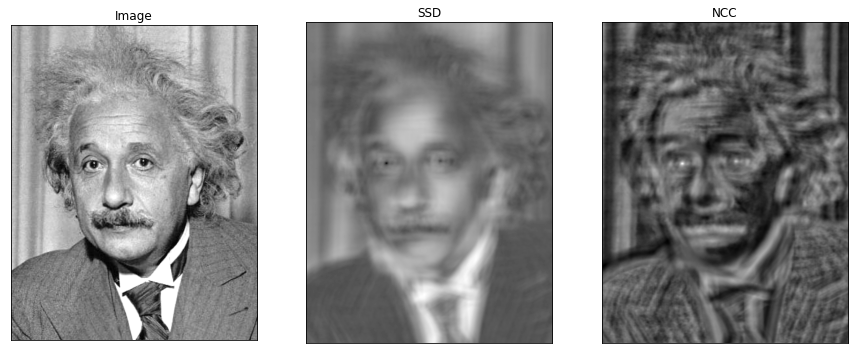

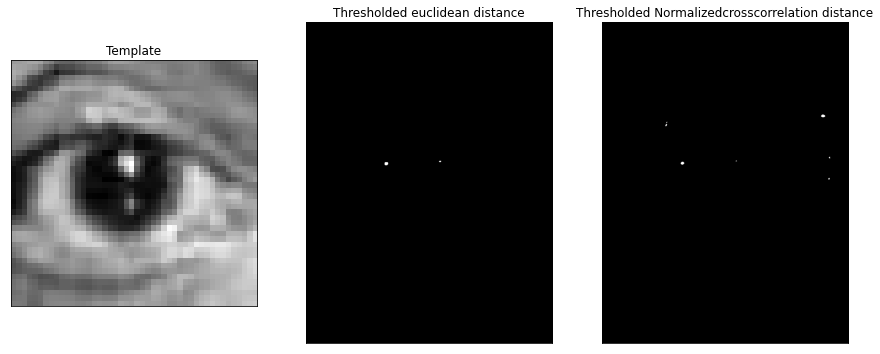

In [6]:
einstein_br = np.array(io.imread('images/einstein_br.png'))

ebr_ssd = ssd_fast(einstein_br, eye)
ebr_ncc = match_template(einstein_br, eye)

visualize3(einstein_br, ebr_ssd, ebr_ncc, 'Image', 'SSD', 'NCC')


visualize3(eye, mask_ncc(ebr_ncc, 0.296), mask_ssd(ebr_ssd, 0.296), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [7]:
print('SSD: ', ebr_ssd.max(), ebr_ssd.min())
print('NCC: ', ebr_ncc.max(), ebr_ncc.min())

SSD:  1.0 0.0
NCC:  0.9768232838639492 -0.521254568963075


Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

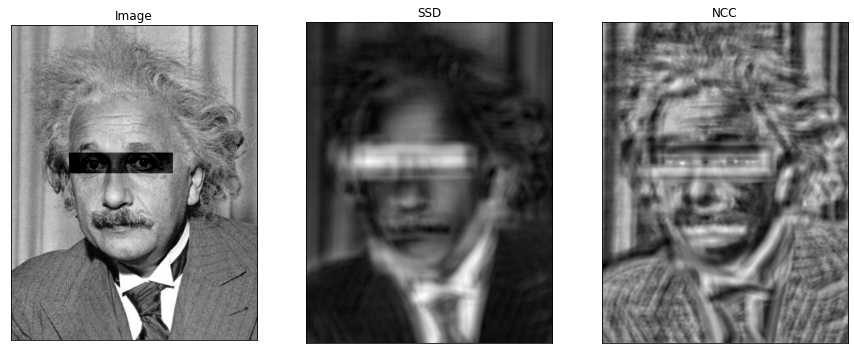

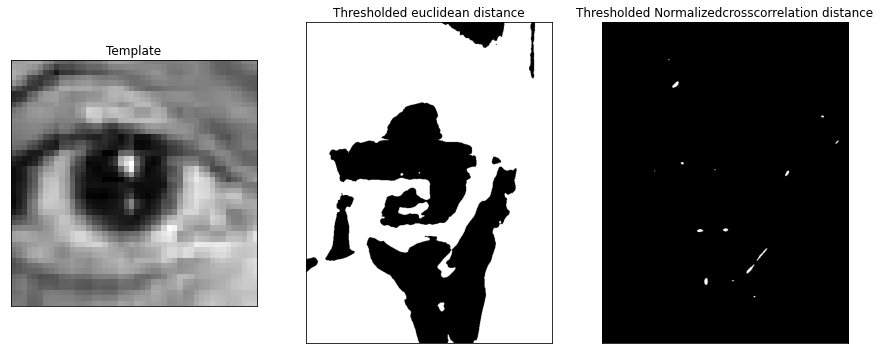

In [8]:
einstein_mask = np.array(io.imread('images/einstein_mask.png'))

emask_ssd = ssd_fast(einstein_mask, eye)
emask_ncc = match_template(einstein_mask, eye)

visualize3(einstein_mask, emask_ssd, emask_ncc, 'Image', 'SSD', 'NCC')


visualize3(eye, mask_ssd(emask_ssd, 0.296), mask_ncc(emask_ncc, 0.15), 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

Print the minimum SSD and the maximum NCC

In [9]:
print('SSD: ', ebr_ssd.max(), ebr_ssd.min())
print('NCC: ', ebr_ncc.max(), ebr_ncc.min())

SSD:  1.0 0.0
NCC:  0.9768232838639492 -0.521254568963075


What are the distances between the template and the image around the eyes of the image? 

In SSD case be can see that arround eyes, the distance is very big. Comparing to the other ditance images, black points are on the eyes, with the mask, the area arround the eyes is very white.

For NCC, there is a lot of unexpected near distances arround the eyes. Comparing to prevois images the template matching is giving a lot of near points that are cleary not matching the template.

Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

Answers:
* Yes. Changing the contrast implies changing the numeric value of each pixel augmenting the standard deviation of the cum of all te pixels (ie, the whites become more white, the dark ones more darker and the middle ones tend to one or another).
* Yes but barely results based, but there isn't a big difference on the results. CHosing the same threshold for the two images gives almost the same result
* It only has the threshold in the detection of the distnace, which is a good thing for certain types of images (industrial pieces, very concrete parts of images etc)

**1.3** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

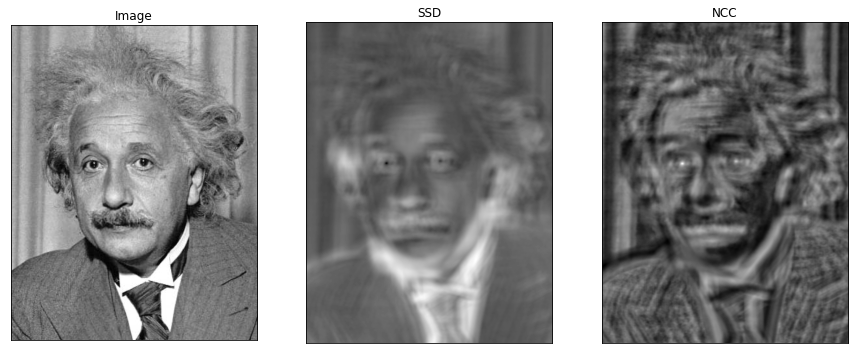

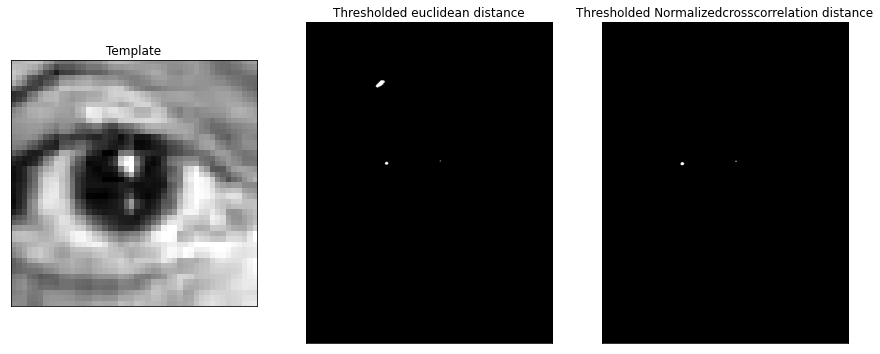

In [10]:
eye = io.imread('./images/eye_br.png')

ed = ssd_fast(einstein, eye)
ncc = match_template(einstein, eye)

#thresholds

einstein_ncc_mask = np.ones(ncc.shape)
einstein_ed_mask = np.ones(ed.shape)

einstein_ncc = normalize(ncc)

einstein_ncc_mask[ncc <= ncc.max()-0.4] = 0
einstein_ed_mask[ed > 0.245] = 0

#todo imprimir i conclusions
visualize3(einstein, ed, ncc, 'Image', 'SSD', 'NCC')


visualize3(eye, einstein_ed_mask, einstein_ncc_mask, 
           'Template', 'Thresholded euclidean distance', 'Thresholded Normalizedcrosscorrelation distance')

For NCC we must change the threshold because, as template changed, the NCC with the original image is larger.

The same happens with SSD. As we take a less restrictive threshold to mathc right eye, some other parts are computed as good matches, as we can see i the threshold eucliden distance image. 

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

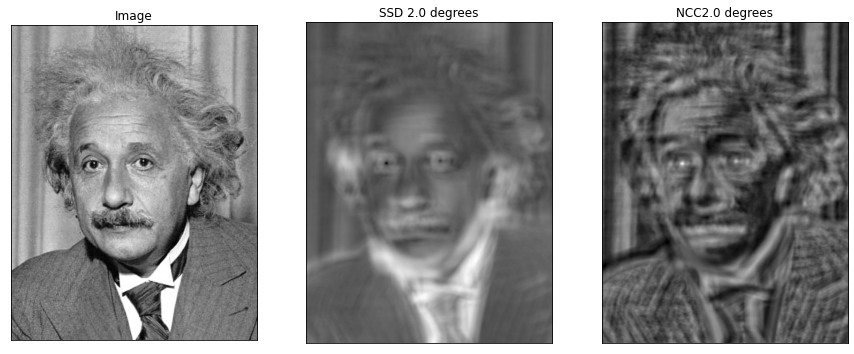

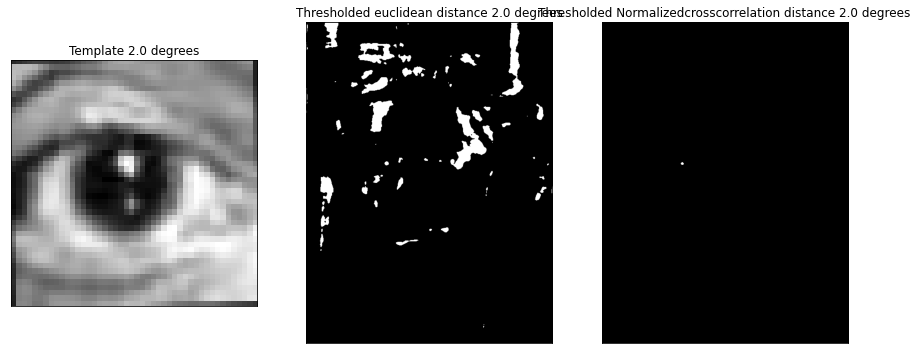

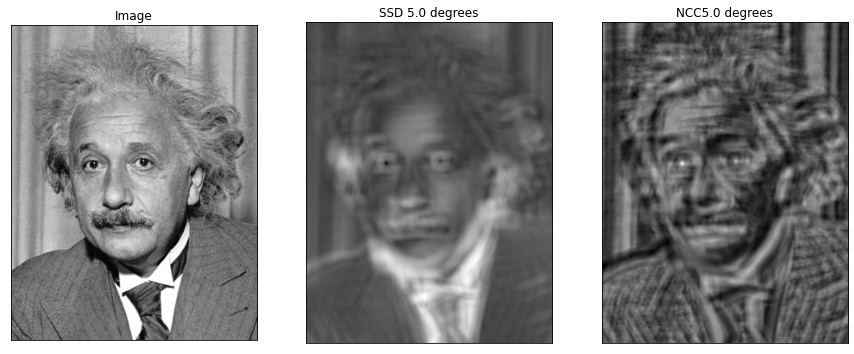

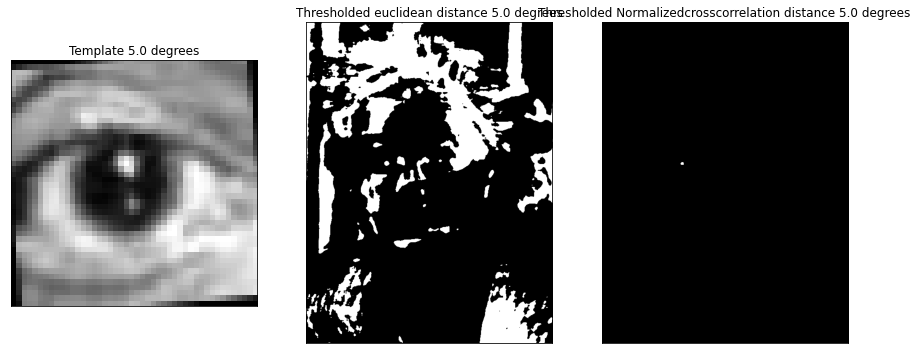

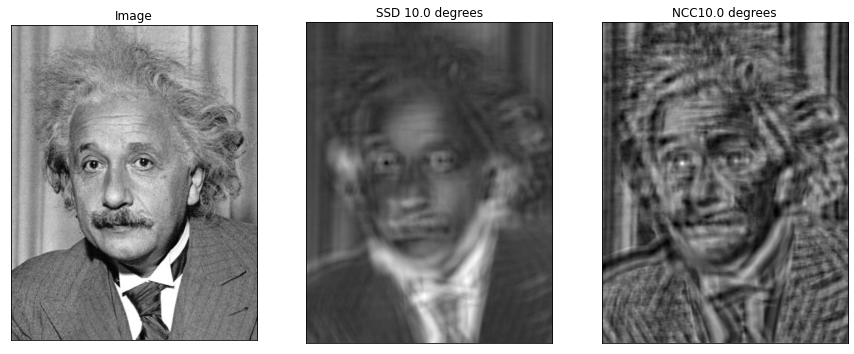

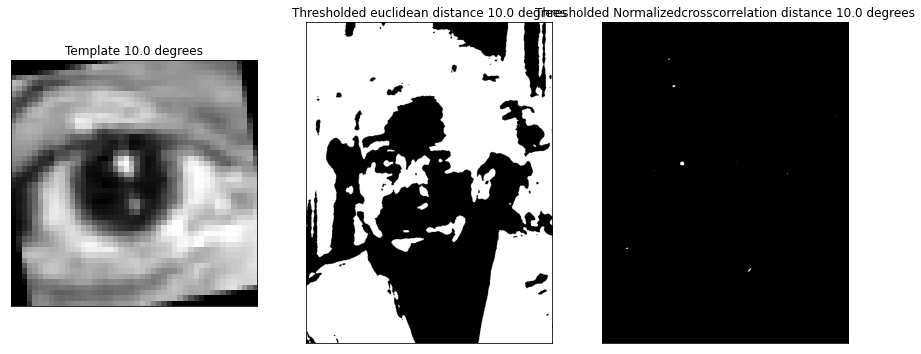

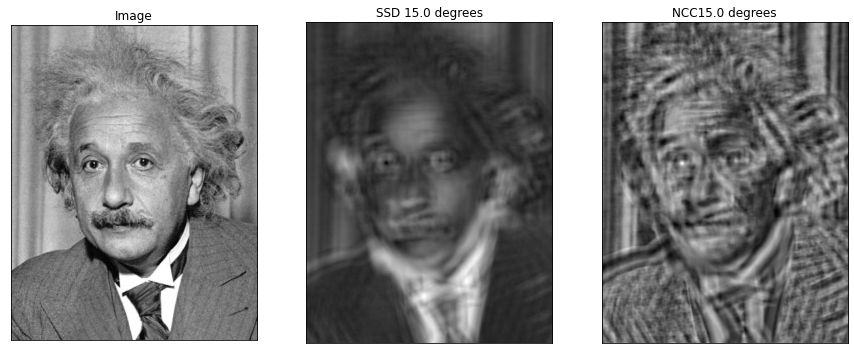

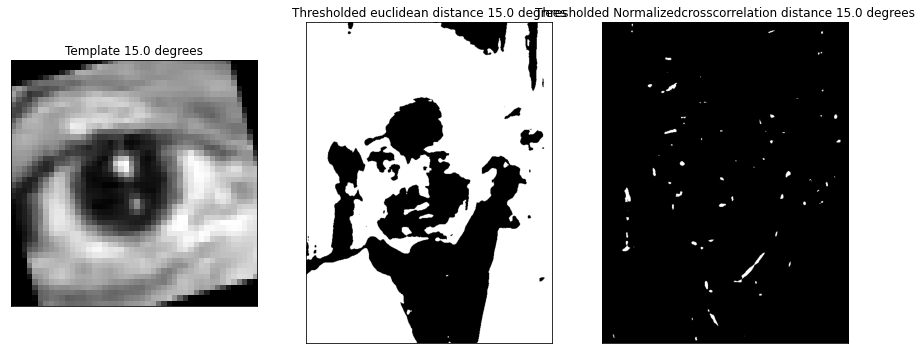

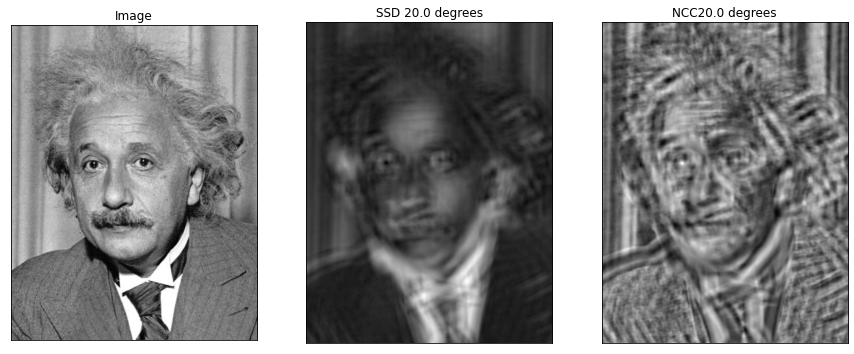

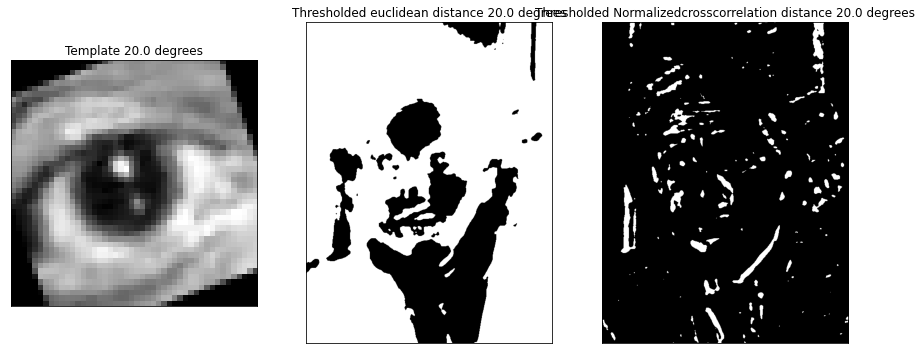

In [11]:
from skimage.transform import rotate

rotations = [2.0,5.0,10.0,15.0,20.00]

for r in rotations:
    reye = rotate(eye, r)
    ed = ssd_fast(einstein, reye)
    ncc = match_template(einstein, reye)
    
    einstein_ncc_mask = np.ones(ncc.shape)
    einstein_ed_mask = np.ones(ed.shape)

    einstein_ncc = normalize(ncc)

    einstein_ncc_mask[ncc <= ncc.max()-0.296] = 0
    einstein_ed_mask[ed > 0.296] = 0
    
    visualize3(einstein, ed, ncc, 'Image', 'SSD '+str(r)+" degrees", 'NCC'+str(r)+" degrees")

    visualize3(reye, einstein_ed_mask, einstein_ncc_mask, 
               'Template '+str(r)+" degrees", 'Thresholded euclidean distance '+str(r)+" degrees", 'Thresholded Normalizedcrosscorrelation distance '+str(r)+" degrees")

Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

Answers:
* We superpose the eye in all the possible ways above the image and calculate the distance with the pattern and the image (NCC is the algebraic norm and ED the euclidean distance). Neverless, analizing the minimums and the maximums of those images respectively gives us the pixel where the pattern coincides the best.
* It affects the same way. Moving one meter to the left is the same as moving minus one meter to the right
* It only has the threshold in the detection of the distnace, which is a good thing for certain types of images (industrial pieces, very concrete parts of images etc)

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.png` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.png`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

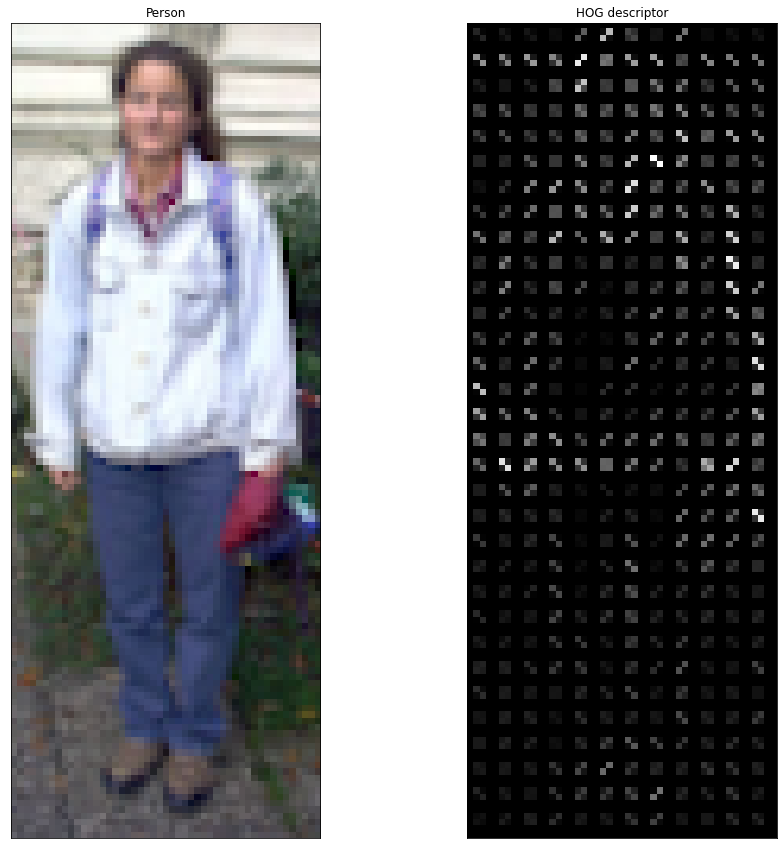

In [44]:
from skimage.feature import hog

PPC = (4,4)
CPB = (2,2)

person = io.imread('images/person_template.bmp')

hog_person = hog(person, orientations=8, pixels_per_cell=PPC,
                cells_per_block=CPB, visualize=True)
visualize2(person, hog_person[1], 'Person', 'HOG descriptor')

**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="100">

In [17]:
def visualize_cars(car,im,im_result,pos_x,pos_y,wcar, hcar):
        fig=plt.figure(figsize=(18,3))
        ax1=plt.subplot(1,3,1)
        ax2=plt.subplot(1,3,2)
        ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
        ax1.axis('off')
        ax1.set_title('car template')
        ax1.imshow(car, cmap='gray')
        ax2.set_title('Best region match')
        ax2.axis('off')
        ax2.imshow(im, cmap='gray')
        ax3.set_title('Best region in HOG')
        ax3.axis('off')
        ax3.imshow(im_result, cmap='gray')
        rect2 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        rect3 = plt.Rectangle((pos_x-wcar/2, pos_y-hcar/2), wcar, hcar, edgecolor='r', facecolor='none')
        ax2.add_patch(rect2)
        ax3.add_patch(rect3)

        plt.show()

In [50]:
def hog_distances(hog_pattern, target, pattern):
    
    hpat, wpat = pattern.shape[0], pattern.shape[1]
    fd_pattern, hog_pattern = hog_pattern[0], hog_pattern[1]
    
    distances = np.zeros((target.shape[0], target.shape[1]))
    height,width = target.shape[0], target.shape[1]
    
    for i in range(0, height-hpat, 5):
        for j in range(0, width-wpat, 5):
            
            region = image[i:i+hpat, j:j+wpat]
            fd_region, hog_region = hog(region, orientations=8, pixels_per_cell=PPC, 
                                        cells_per_block=CPB, visualize=True)
            distances[i+round(hpat/2),j+round(wpat/2)]=np.dot(fd_pattern,fd_region)
            
    return distances

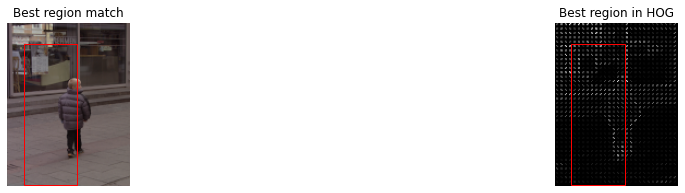

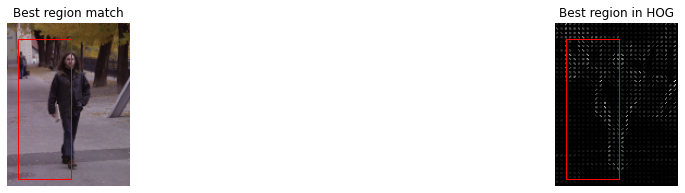

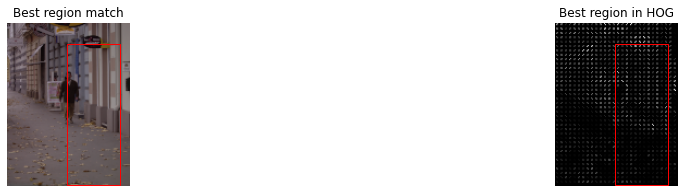

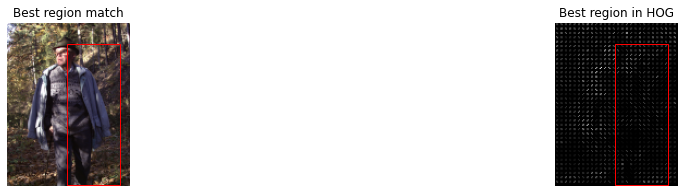

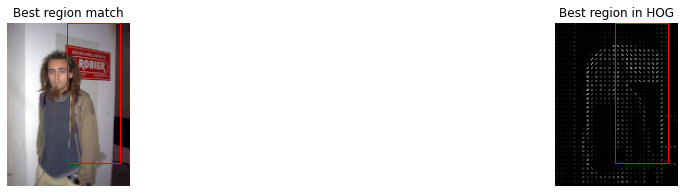

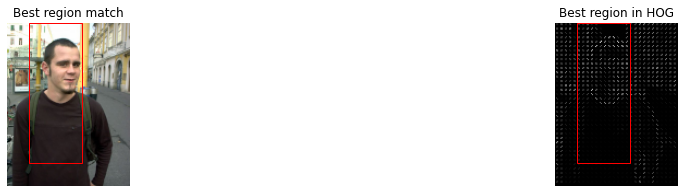

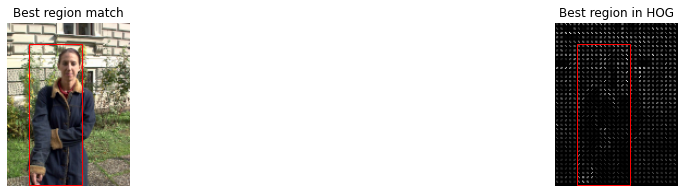

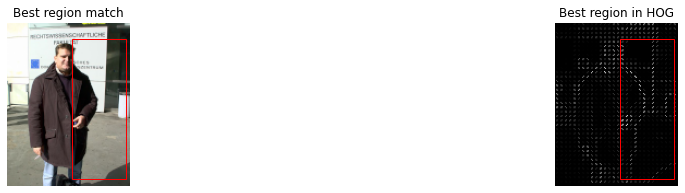

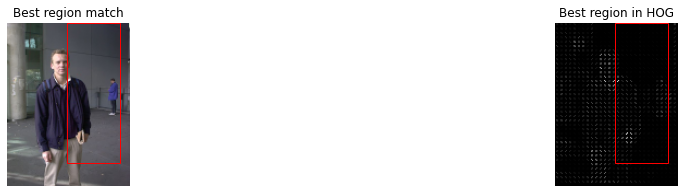

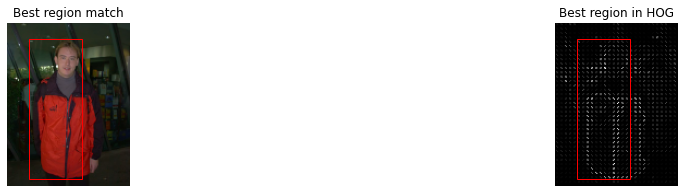

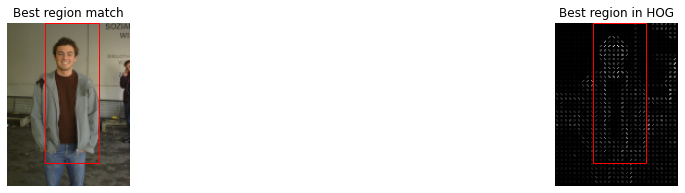

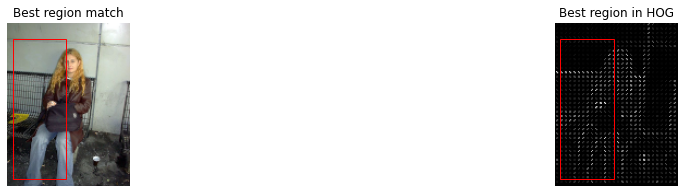

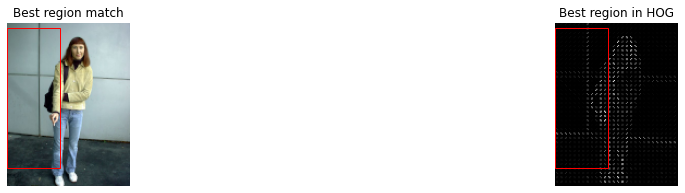

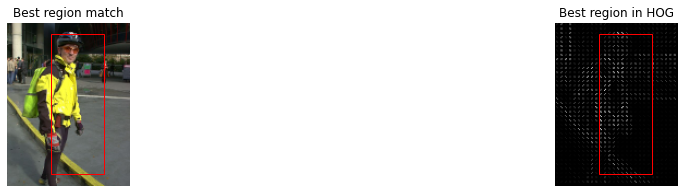

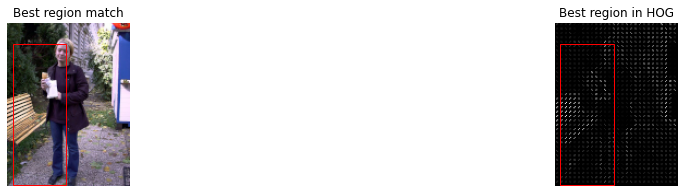

In [51]:
ic = io.ImageCollection('images/TestPersonImages/*.bmp')

for image in ic:
    hog_target = hog(image, orientations=8, pixels_per_cell=PPC,
                    cells_per_block=CPB, visualize=True)

    distances = hog_distances(hog_person, image, person)

    ij = np.unravel_index(np.argmax(distances), distances.shape)
    pos_x, pos_y = ij[::-1]


    visualize_cars(person, image, hog_target[1],  pos_x,  pos_y,  person.shape[1], person.shape[0]) 

What is the dimension of your HOG descriptor? Explain it.

In [20]:
hog_person[0].shape #Hauria de ser algo en plan el nombre de celes pel nombre d'orientacions, pero no acabo de veure el que

(10912,)

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

In [4]:
# Your solution here

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

In [ ]:
# Your solution here

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here